In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import statsmodels

In [3]:
df = pd.read_stata("../data/variables_productos_primarios.dta",index_col="fecha")
df = df.drop(["mes","anio"],axis=1)
df["pp"] = df.pp / 1_000_000
df

,itcr,ip,pre,pp
fecha,,,,
2005-01-01,105.929359,86.866026,1423.333333,508.020737
2005-02-01,103.960244,87.907449,969.666667,500.539941
2005-03-01,102.549715,86.226525,1730.000000,656.181802
2005-04-01,101.267876,87.964450,620.000000,939.064907
2005-05-01,100.294069,89.117152,54.666667,1028.823820
...,...,...,...,...
2022-07-01,44.102487,208.916689,0.000000,2431.418408
2022-08-01,43.439754,200.965695,146.666667,1988.408046
2022-09-01,43.289343,205.021010,106.666667,2071.879245


<Axes: xlabel='fecha'>

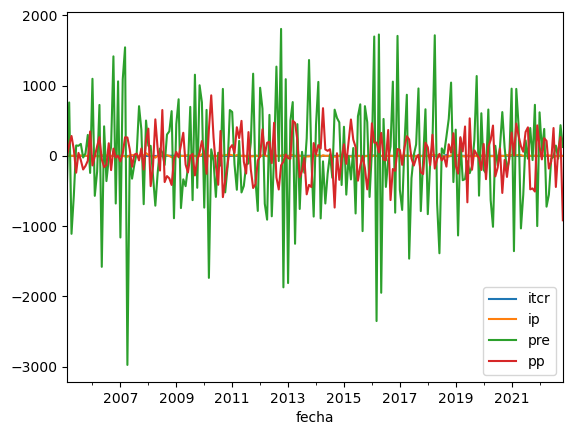

In [4]:
df_diff = df.copy()
df_diff = df_diff.diff().dropna()
df_diff.plot()

In [5]:
decomposition = sm.tsa.seasonal_decompose(df['pp'], model='additive', two_sided=False)
# Assuming you have other exogenous variables in a DataFrame called 'exog_data'
df['pp_tendencia'] = decomposition.trend
df['pp_estacional'] = decomposition.seasonal

df = df.dropna()
df


,itcr,ip,pre,pp,pp_tendencia,pp_estacional
fecha,,,,,,
2006-01-01,97.711428,96.979225,1680.000000,575.222070,678.654456,-219.379456
2006-02-01,98.061291,111.739145,1110.666667,566.794332,684.215111,-282.817487
2006-03-01,97.118486,102.681629,884.666667,704.605051,688.993346,-69.992233
2006-04-01,95.906041,96.888351,1609.666667,971.140949,692.347483,233.736746
2006-05-01,95.052595,105.611757,29.666667,919.805311,689.141547,394.916431
...,...,...,...,...,...,...
2022-07-01,44.102487,208.916689,0.000000,2431.418408,2049.265446,292.309439
2022-08-01,43.439754,200.965695,146.666667,1988.408046,2019.815046,294.666613
2022-09-01,43.289343,205.021010,106.666667,2071.879245,1978.316012,-5.483544


In [6]:
result = adfuller(decomposition.resid.dropna())

# Extract and print the ADF test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Interpret the results
if p_value <= 0.05:
    print("Reject the null hypothesis: The residual series is stationary.")
else:
    print("Fail to reject the null hypothesis: The residual series is non-stationary.")

ADF Statistic: -5.747458945198298
p-value: 6.074649199917201e-07
Reject the null hypothesis: The residual series is stationary.


In [9]:
def adfuller_test(df:pd.DataFrame,variable:str):
    print(variable)
    result = adfuller(df[variable])
    adf_statistic = result[0]
    p_value = result[1]

    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')

    # Interpret the results
    if p_value <= 0.05:
        print("Reject the null hypothesis: The residual series is stationary.")
    else:
        print("Fail to reject the null hypothesis: The residual series is non-stationary.")
        
for variable in df_diff.columns:  
    adfuller_test(df,variable)
print("---\n")   
for variable in df_diff.columns:  
    adfuller_test(df_diff,variable)
    

itcr
ADF Statistic: -2.697147717312178
p-value: 0.07453314036925261
Fail to reject the null hypothesis: The residual series is non-stationary.
ip
ADF Statistic: -2.2119157943376613
p-value: 0.20194917099144005
Fail to reject the null hypothesis: The residual series is non-stationary.
pre
ADF Statistic: -2.9175566964560735
p-value: 0.043344153241981355
Reject the null hypothesis: The residual series is stationary.
pp
ADF Statistic: -2.3191374376917704
p-value: 0.16587003054235006
Fail to reject the null hypothesis: The residual series is non-stationary.
---

itcr
ADF Statistic: -3.5026660869626203
p-value: 0.007918886717806162
Reject the null hypothesis: The residual series is stationary.
ip
ADF Statistic: -14.263664773079181
p-value: 1.4125616796851025e-26
Reject the null hypothesis: The residual series is stationary.
pre
ADF Statistic: -9.959485388322177
p-value: 2.3946583226200132e-17
Reject the null hypothesis: The residual series is stationary.
pp
ADF Statistic: -5.4443969685640905

In [8]:
def subplot_descomposicion(decomposition: statsmodels.tsa.seasonal.DecomposeResult):
            
    analisis_estructural = make_subplots(rows=4, cols=1)

    analisis_estructural.add_trace(
        go.Scatter(x = decomposition.observed.index, y = decomposition.observed, name = "Original"), row = 1, col=1
    )

    analisis_estructural.add_trace(
        go.Scatter(x = decomposition.trend.index, y = decomposition.trend, name = "Tendencia"), row = 2, col=1
    )

    analisis_estructural.add_trace(
        go.Scatter(x = decomposition.seasonal.index, y = decomposition.seasonal, mode = "lines", name = "Estacionalidad"), row=3, col=1
    )

    analisis_estructural.add_trace(
                go.Scatter(x = decomposition.resid.index, y = decomposition.resid, mode = "markers", name="Residuos"), row=4, col=1
                )

    analisis_estructural.update_layout(template=None,separators=",.",font_family="georgia",
                                       title_text = f"Prueba de los componentes: Tendencia, estacionalidad y residuos<br><sup>En millones de US$", height=600)
    analisis_estructural.update_yaxes(tickformat = ",")
    return analisis_estructural

# subplot_descomposicion(decomposition).write_html("../output/tendencia-estacionalidad.html")
# subplot_descomposicion(decomposition).write_image("../output/tendencia-estacionalidad.pdf")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
